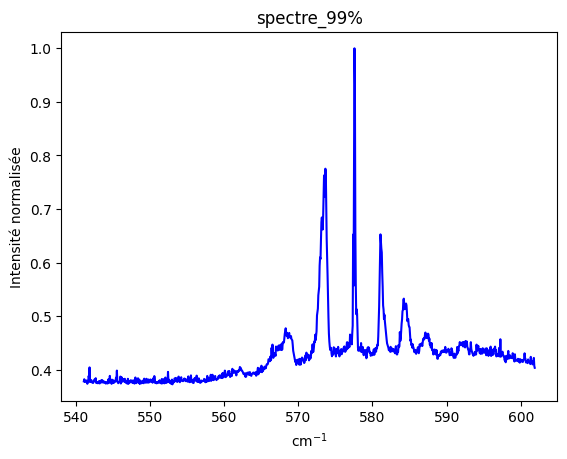

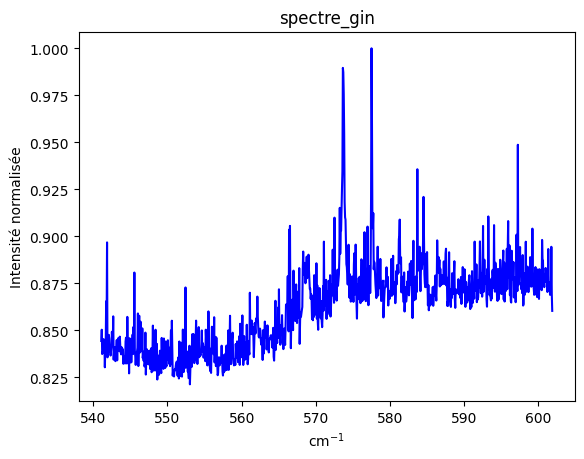

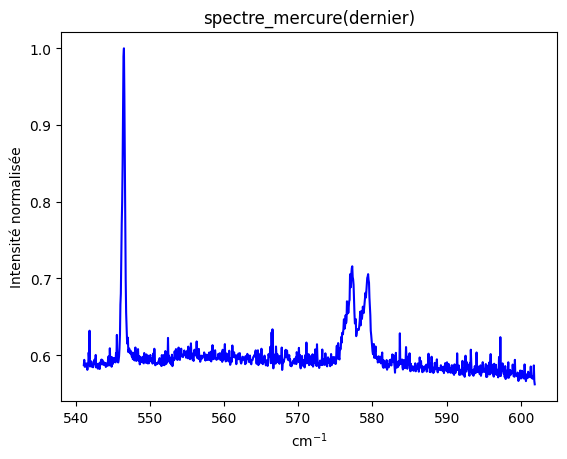

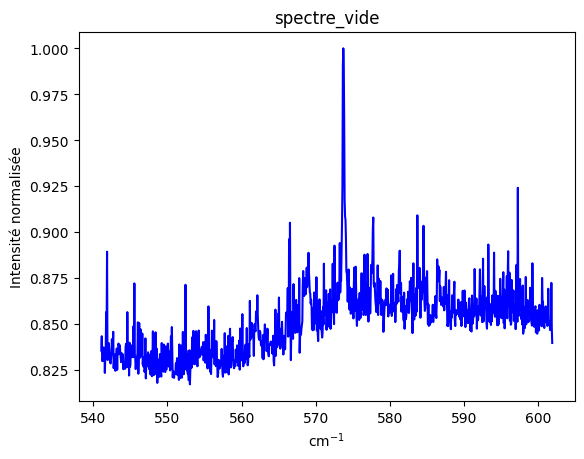

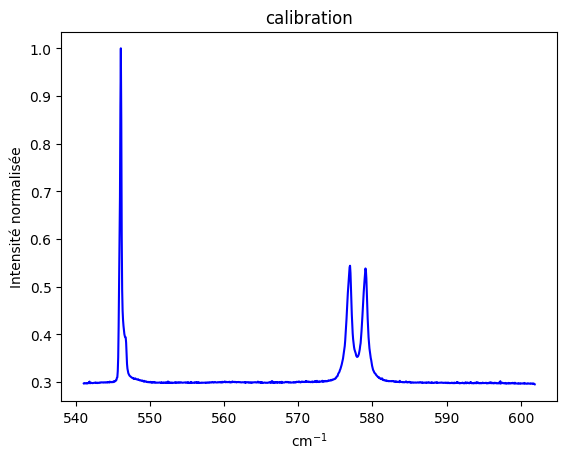

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrometer_data(file_path):
    # Load data using NumPy
    data = np.loadtxt(file_path)

    # Extract y and x points from the loaded data
    y_points = data[0, :]
    x_points = data[1, :]

    # Normalize y points by dividing by the max value
    y_points_normalized = y_points / np.max(y_points)

    # Plot the normalized data with smaller marker size
    plt.plot(x_points, y_points_normalized, marker='', linestyle='-', color='b', markersize=3)
    plt.title(f'{file_path}')
    plt.xlabel(r'cm$^{-1}$')
    plt.ylabel('Intensité normalisée')
    plt.show()
    return [x_points, y_points]

# Provide the path to your .txt file
file_paths = ['spectre_99%', 'spectre_gin', 'spectre_mercure(dernier)', 'spectre_vide', 'calibration']

# Call the function to plot the normalized data
for files in file_paths:
    plot_spectrometer_data(files)
